In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline
from datetime import timedelta

In [2]:
claims = pd.read_csv('claims.csv')
cust_demo = pd.read_csv('cust_demographics.csv')

In [3]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [5]:
cust_demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [6]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [7]:
#combining claims data and customer demographics data

cust_claims = pd.merge(claims,cust_demo,left_on='customer_id',right_on='CUST_ID',how = 'left')
cust_claims = cust_claims.drop(columns = 'CUST_ID')
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [8]:
cust_claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
dtype: int64

In [9]:
cust_claims.duplicated().sum()

0

In [10]:
#Treating missing values
def null_treat(x):
    if (x.dtype==float) or (x.dtype==int):
        x = x.fillna(x.mean())
    elif (x.dtype==object):
        x = x.fillna(x.mode()[0])
    else:
        x
    return x

In [11]:
cust_claims = cust_claims.apply(null_treat)

In [12]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1100 non-null   object 
 8   total_policy_claims  1100 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1100 non-null   object 
 11  DateOfBirth          1100 non-null   object 
 12  State                1100 non-null   object 
 13  Contact              1100 non-null   object 
 14  Segment              1100 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [13]:
cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,Male,13-May-77,NV,956-871-8691,Gold


In [14]:
#converting claim date and DateofBirth to datetime

cust_claims['claim_date']= pd.to_datetime(cust_claims.claim_date)
cust_claims['DateOfBirth']= pd.to_datetime(cust_claims.DateOfBirth)

In [15]:
pd.DatetimeIndex(cust_claims.DateOfBirth)

DatetimeIndex(['1979-01-12', '2070-01-13', '1984-03-11', '1986-05-01',
               '1977-05-13', '1977-05-17', '1999-03-02', '1999-10-25',
               '1993-10-12', '2066-09-09',
               ...
               '1986-05-01', '1986-05-01', '1986-05-01', '1986-05-01',
               '1986-05-01', '1986-05-01', '1986-05-01', '1986-05-01',
               '1986-05-01', '1986-05-01'],
              dtype='datetime64[ns]', name='DateOfBirth', length=1100, freq=None)

In [16]:

cust_claims['DateOfBirth'] = np.where(pd.DatetimeIndex(cust_claims['DateOfBirth']).year>2000,cust_claims['DateOfBirth']-timedelta(100*365.25),cust_claims['DateOfBirth'])


In [17]:
# converting claim_id,customer_id and total_policy_claims to int data type

cust_claims[['claim_id','customer_id','total_policy_claims']]=cust_claims[['claim_id','customer_id','total_policy_claims']].astype(int)

In [18]:
#converting claim_amount to float

cust_claims['claim_amount'] = cust_claims['claim_amount'].apply(lambda x: float(str(x).replace('$','')))

In [19]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   int64         
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1100 non-null   float64       
 8   total_policy_claims  1100 non-null   int64         
 9   fraudulent           1100 non-null   object        
 10  gender               1100 non-null   object        
 11  DateOfBirth          1100 non-null   datetime64[ns]
 12  State                1100 non-null   object        
 13  Contact              1100 non-nul

In [20]:
cust_claims['alert_flag'] = np.where(cust_claims.police_report=='Yes',0,1)

In [21]:
sum(cust_claims.customer_id.duplicated())

7

In [22]:
cust_claims.customer_id = cust_claims.sort_values(by ='claim_date',ascending=False )['customer_id'].drop_duplicates()
cust_claims.dropna(inplace=True)

In [23]:
cust_claims.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
alert_flag             0
dtype: int64

In [24]:
cust_claims['age'] = (cust_claims.claim_date - cust_claims.DateOfBirth)/(timedelta(days = 365.25))
cust_claims.age =cust_claims.age.astype(int)

In [25]:
cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age
0,54004764,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,VT,789-916-8172,Platinum,1,38
1,33985796,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,ME,265-543-1264,Silver,1,48
3,13015401,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,MA,413-187-7945,Silver,1,32
6,12878692,18401412.0,Driver error,2018-01-13,Auto,No,Material only,1730.0,4,No,Male,1999-03-02,AR,752-398-2914,Gold,1,18
7,27026412,73486606.0,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3,No,Male,1999-10-25,AK,256-968-9172,Silver,1,18


In [26]:
cust_claims['age_category']=np.where(cust_claims.age<18,'Children',np.where(cust_claims.age<30,'Youth',np.where(cust_claims.age<60,'Adult','Senior')))

In [27]:
cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_category
0,54004764,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,VT,789-916-8172,Platinum,1,38,Adult
1,33985796,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,ME,265-543-1264,Silver,1,48,Adult
3,13015401,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,MA,413-187-7945,Silver,1,32,Adult
6,12878692,18401412.0,Driver error,2018-01-13,Auto,No,Material only,1730.0,4,No,Male,1999-03-02,AR,752-398-2914,Gold,1,18,Youth
7,27026412,73486606.0,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3,No,Male,1999-10-25,AK,256-968-9172,Silver,1,18,Youth


In [28]:
#8. What is the average amount claimed by the customers from various
#segments?

pd.pivot_table(data = cust_claims,index ='Segment',values = 'claim_amount',aggfunc='mean').rename(columns={'claim_amount':'Avg_claim_amount'})

,Avg_claim_amount
Segment,
Gold,12143.525907
Platinum,11919.921053
Silver,11388.066474


In [29]:
#What is the total claim amount based on incident cause for all the claims
#that have been done at least 20 days prior to 1st of October, 2018
x = dt(2018,10,1)

In [30]:

df = cust_claims[cust_claims.claim_date<=(x-timedelta(days = 20))]
pd.pivot_table(data=df,index = 'incident_cause',values = 'claim_amount',aggfunc='sum')

,claim_amount
incident_cause,
Crime,672732.0
Driver error,3214400.0
Natural causes,1217691.5
Other causes,3571959.0
Other driver error,3201811.5


In [31]:
#. How many adults from TX, DE and AK claimed insurance for driver
#related issues and causes?

cust_claims[cust_claims['State'].isin(['TX','DE','AK'])&(cust_claims['incident_cause']=='Driver error')&(cust_claims['age_category']=='Adult')]['customer_id'].count()

12

In [32]:
#Draw a pie chart between the aggregated value of claim amount based
#on gender and segment. Represent the claim amount as a percentage on
#the pie chart.

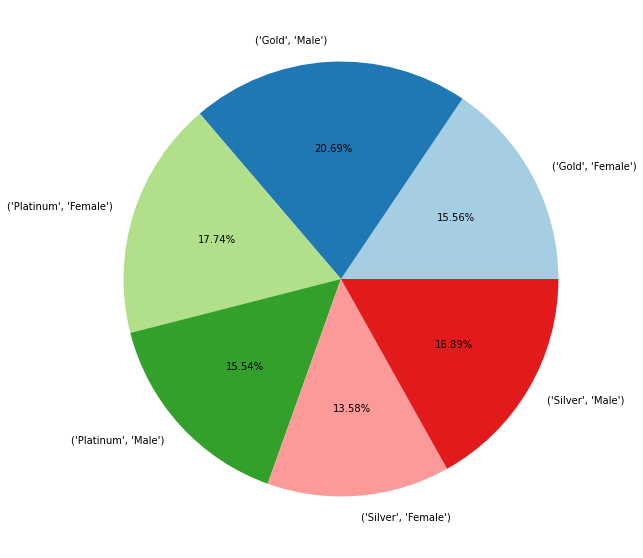

In [33]:
gs = pd.pivot_table(data = cust_claims,index=['Segment','gender'],values ='claim_amount',aggfunc='sum')
gs
plt.figure(figsize=(10,10))
co = sns.set_palette('Paired')
figure  = plt.pie(gs.claim_amount,labels=gs.index,autopct='%.2f%%',colors= co)
plt.show()

<Figure size 18000x18000 with 0 Axes>

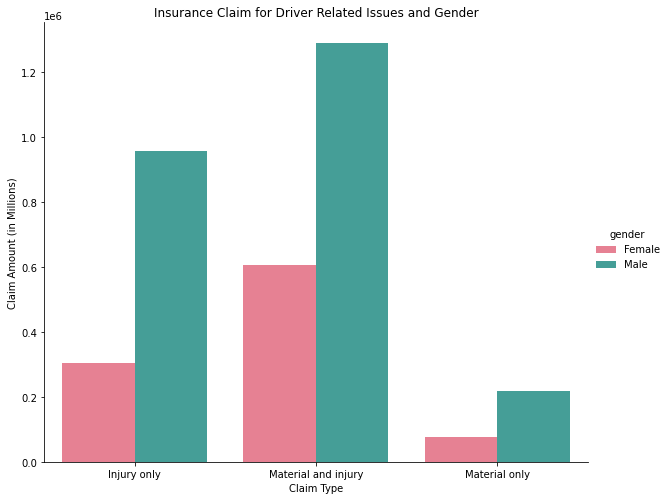

In [34]:
#12. Among males and females, which gender had claimed the most for any
#type of driver related issues? E.g. This metric can be compared using a
#bar chart

gd =pd.DataFrame(cust_claims[cust_claims.incident_cause=='Driver error'].groupby(by=['gender','claim_type'])['claim_amount'].sum()).reset_index()
gd
plt.figure(figsize=(20,20),dpi=900)
figure = sns.catplot(data=gd,kind='bar',x ='claim_type',y = 'claim_amount', hue='gender',palette='husl',aspect=1.2,height=7)
plt.title('Insurance Claim for Driver Related Issues and Gender',)
plt.xlabel('Claim Type')
plt.ylabel('Claim Amount (in Millions)')
plt.show()

Text(0.5, 1.0, 'Fraudulent Policy Claims and Age Group')

<Figure size 18000x18000 with 0 Axes>

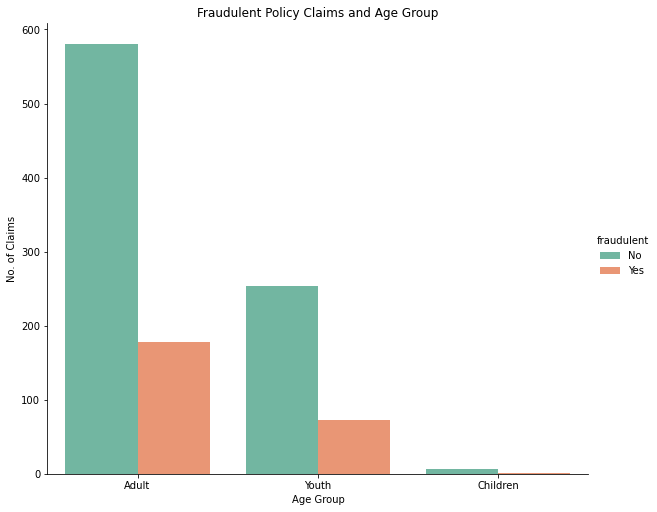

In [35]:
#Which age group had the maximum fraudulent policy claims? Visualize
#it on a bar chart

fr = pd.pivot_table(data=cust_claims,index = [cust_claims.age_category,cust_claims.fraudulent],values = 'total_policy_claims' ,aggfunc='count').reset_index().sort_values(by='total_policy_claims',ascending=False)
plt.figure(figsize=(20,20),dpi=900)
figure=sns.catplot(data=fr,x='age_category',kind = 'bar',y='total_policy_claims',hue='fraudulent',palette='Set2',aspect=1.2,height=7)
plt.xlabel('Age Group')
plt.ylabel('No. of Claims')
plt.title('Fraudulent Policy Claims and Age Group')

Text(0.5, 1.0, 'Fraudulent Policy Claims and Age Group')

<Figure size 18000x18000 with 0 Axes>

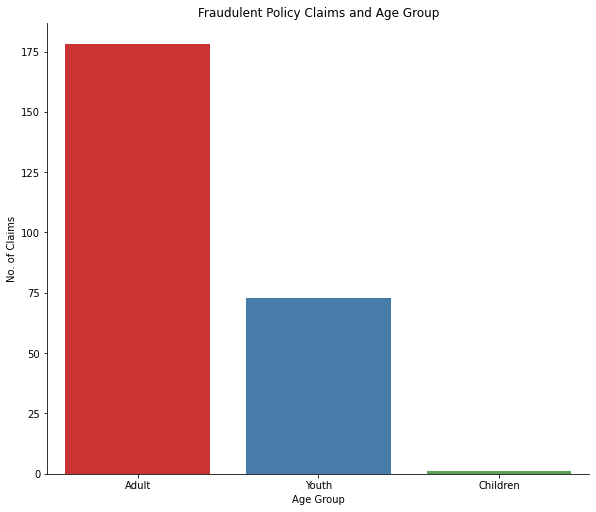

In [36]:
#OR
df = cust_claims[cust_claims.fraudulent=='Yes']
fr = pd.pivot_table(data=df,index = [df.age_category,df.fraudulent],values = 'total_policy_claims' ,aggfunc='count').reset_index().sort_values(by='total_policy_claims',ascending=False)
plt.figure(figsize=(20,20),dpi=900)
figure=sns.catplot(data=fr,x='age_category',kind = 'bar',y='total_policy_claims',palette='Set1',aspect=1.2,height=7)
plt.xlabel('Age Group')
plt.ylabel('No. of Claims')
plt.title('Fraudulent Policy Claims and Age Group')

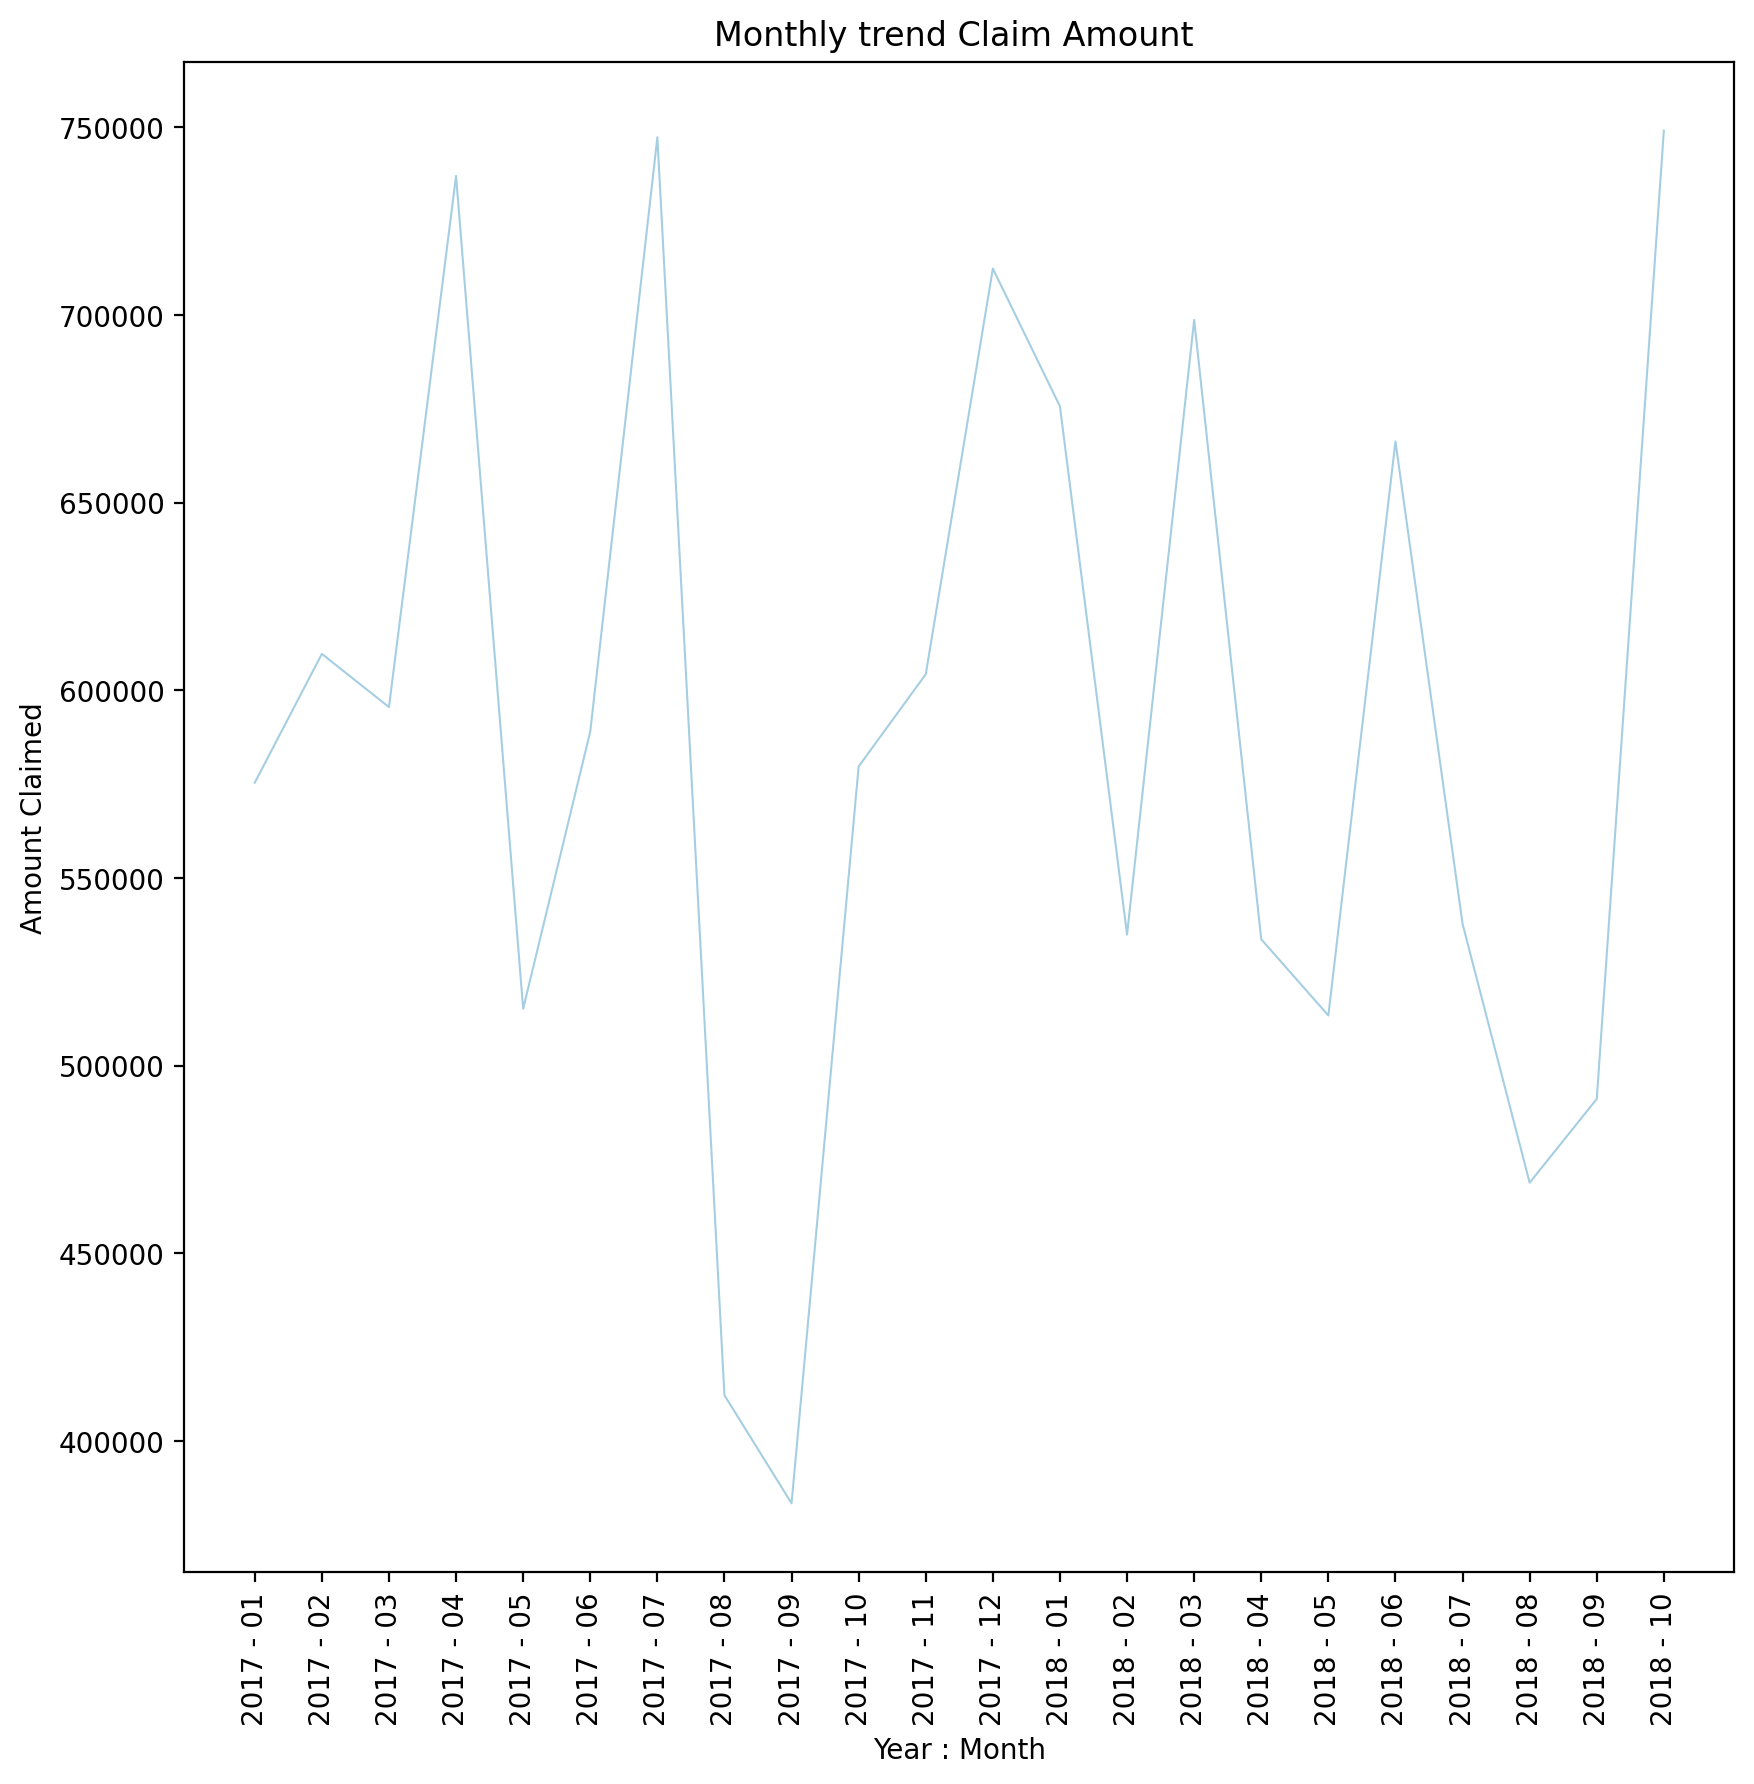

In [37]:
#Visualize the monthly trend of the total amount that has been claimed
#by the customers. Ensure that on the “month” axis, the month is in a
#chronological order not alphabetical order.

trend = pd.pivot_table(data=cust_claims,index=cust_claims.claim_date.dt.strftime('%Y - %m'),values='claim_amount',aggfunc='sum')
plt.figure(figsize=(10,10),dpi=200)
figure=sns.lineplot(data = trend,x = 'claim_date',y='claim_amount',markers=True,size=2,legend=False)
plt.xlabel('Year : Month')
plt.ylabel('Amount Claimed')
plt.title('Monthly trend Claim Amount ')
plt.xticks(rotation = 90)
plt.show()

In [38]:
#15. What is the average claim amount for gender and age categories and
#suitably represent the above using a facetted bar chart, one facet that
#represents fraudulent claims and the other for non-fraudulent claims.


In [39]:
f = pd.pivot_table(data=cust_claims,index=['gender','age_category','fraudulent'],values='claim_amount',aggfunc='mean').reset_index()
f

,gender,age_category,fraudulent,claim_amount
0,Female,Adult,No,11850.629630
1,Female,Adult,Yes,11833.426966
2,Female,Children,No,11210.000000
3,Female,Youth,No,11973.538462
4,Female,Youth,Yes,6394.625000
5,Male,Adult,No,11479.387097
6,Male,Adult,Yes,15821.668539
7,Male,Children,No,18316.000000
8,Male,Children,Yes,32407.000000
9,Male,Youth,No,11588.387097


<Figure size 2000x2000 with 0 Axes>

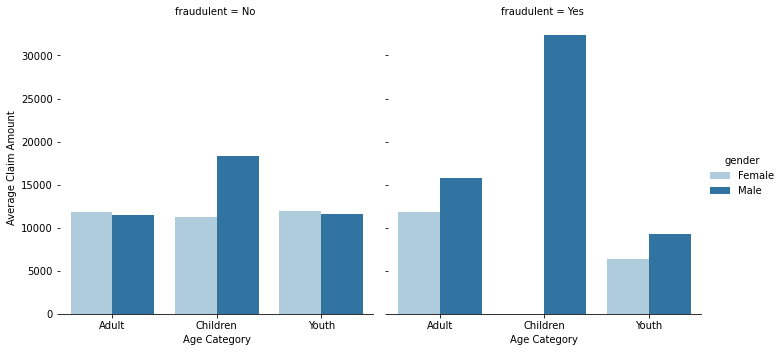

In [40]:
plt.figure(figsize=(10, 10), dpi=200)
figure=sns.catplot(data=f,
            kind='bar',
            x='age_category',
            y='claim_amount',
            hue='gender',
            col='fraudulent',
            palette='Paired',
            )
(figure.set_axis_labels("Age Category", "Average Claim Amount")
  .set_titles("{col_var} = {col_name} ")
  .despine(left=True))

In [41]:
import scipy.stats as stats

In [44]:
cust_claims.head()


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_category
0,54004764,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,VT,789-916-8172,Platinum,1,38,Adult
1,33985796,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,ME,265-543-1264,Silver,1,48,Adult
3,13015401,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,MA,413-187-7945,Silver,1,32,Adult
6,12878692,18401412.0,Driver error,2018-01-13,Auto,No,Material only,1730.0,4,No,Male,1999-03-02,AR,752-398-2914,Gold,1,18,Youth
7,27026412,73486606.0,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3,No,Male,1999-10-25,AK,256-968-9172,Silver,1,18,Youth


In [ ]:
claim_m = cust_claims[cust_claims.gender=='Male']['claim_amount']
claim_f = cust_claims[cust_claims.gender=='Female']['claim_amount']

In [ ]:
#checking normality assumption of t test
stats.normaltest(claim_m)

In [64]:
stats.normaltest(claim_f)

NormaltestResult(statistic=72.82461412069884, pvalue=1.5358046222136078e-16)

In [55]:
stats.variation(claim_m)*claim_m.mean()

13803.89261445867

In [54]:
stats.variation(claim_f)*claim_f.mean()

13349.289154979931

In [61]:
stats.ttest_ind(claim_m,claim_f)

Ttest_indResult(statistic=0.7685413765839256, pvalue=0.4423319438865344)

In [ ]:
#pvalue greater than 0.05 hence H0 is true i.e there is similairity in the amount claimed by males and females

In [ ]:
#16 . Is there any relationship between age category and segment?

In [58]:
#Using chi square test to find relationship between two categorical variables

stats.chi2_contingency(pd.crosstab(cust_claims.age_category,cust_claims.Segment))


(6.197367604125089,
 0.18488562214528276,
 4,
 array([[267.6925892 , 250.35498628, 239.95242452],
        [  2.8252516 ,   2.64226898,   2.53247941],
        [115.48215919, 108.00274474, 103.51509607]]))

In [60]:
cust_claims.claim_amount.mean()

11830.524702653249

In [65]:
stats.normaltest(cust_claims.claim_amount)

NormaltestResult(statistic=163.46050258205335, pvalue=3.1989161738355716e-36)

In [59]:
stats.ttest_1samp(cust_claims.claim_amount,10000,alternative = 'greater')

Ttest_1sampResult(statistic=4.4510101000777835, pvalue=4.711538228630456e-06)

In [ ]:
#19. Is there any relation between age groups and insurance claims?


In [ ]:
#20. Is there any relationship between total number of policy claims and the
#claimed amount

In [66]:
#checking normality assumption of pearsons correlation test
stats.normaltest(cust_claims.claim_amount)



NormaltestResult(statistic=163.46050258205335, pvalue=3.1989161738355716e-36)

In [67]:
stats.normaltest(cust_claims.total_policy_claims)


NormaltestResult(statistic=458.71181054940325, pvalue=2.466016324877371e-100)

In [62]:
stats.pearsonr(cust_claims.claim_amount,cust_claims.total_policy_claims)

(-0.021900157396936727, 0.4695020202739997)